In [ ]:
# read data
import pandas as pd
import numpy as np
import os
file_student_responses = '/path/to/responses.xlsx'

df = pd.read_excel(file_student_responses)
df = df.set_index('Answers')
responses = df.to_dict()['Labels']
print(responses.keys())


In [ ]:
file_expert_rating = '/path/to/expert/ratings.xlsx'
df = pd.read_excel(file_expert_rating)
df = df.set_index('responses')
expert_rating = df.to_dict()
print(expert_rating['expression '].keys())



In [ ]:
# For "Fidelity", "Expression", and "Applicability" criteria, run `gpt_survey_analysis.ipynb` for the neural network definition

file_fewShot = '/path/to/FewShotDictionary.xlsx'
df = pd.read_excel(file_fewShot)
df = df.set_index('Responses')
fewShot = df.to_dict()
print(fewShot['Expression'].keys())

file_fewShot = '/home/shailja/asee/oneShotDictionary.xlsx'
df = pd.read_excel(file_fewShot)
df = df.set_index('Responses')
oneShot = df.to_dict()
print(fewShot['Expression'].keys())

file_fewShot = '/home/shailja/asee/ZeroShotDictionary.xlsx'
df = pd.read_excel(file_fewShot)
df = df.set_index('Responses')
zeroShot = df.to_dict()
print(fewShot['Expression'].keys())

0.7314337680205316
0.7794583133164321
0.706317955611726
0.7755291020764018
0.8459248296685677
0.7868877596139283
0.5154078563603502
0.4858677846150504
0.4748417620148918


/home/shailja/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


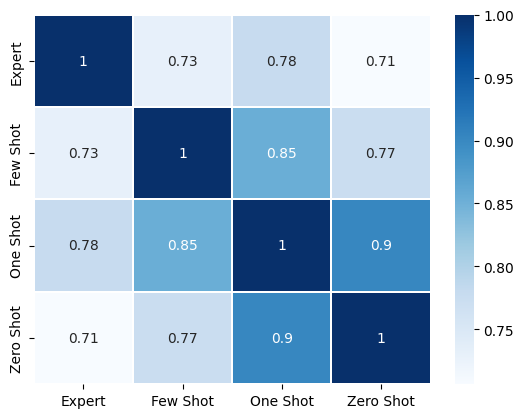

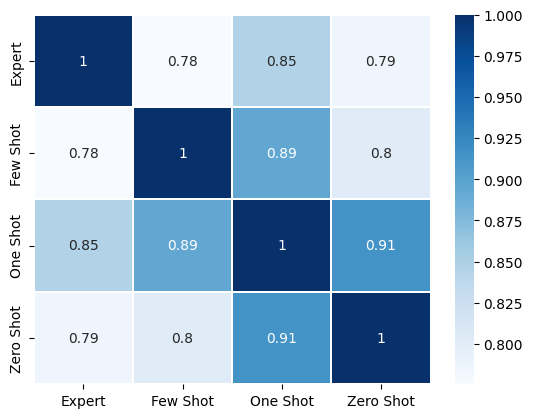

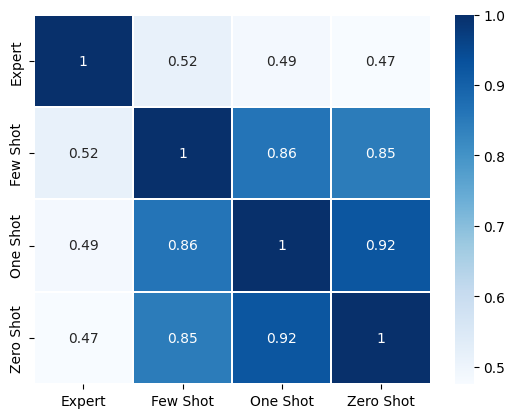

In [4]:
exp_expert = []
exp_fewShot = []
exp_oneShot = []
exp_zeroShot = []
fid_expert = []
fid_fewShot = []
fid_oneShot = []
fid_zeroShot = []
app_expert = []
app_fewShot = []
app_oneShot = []
app_zeroShot = []
for key in fewShot['Expression'].keys():
    exp_expert.append(expert_rating['expression '][key])
    exp_fewShot.append(fewShot['Expression'][key])
    exp_oneShot.append(oneShot['Expression'][key])
    exp_zeroShot.append(zeroShot['Expression'][key])
    fid_expert.append(expert_rating['fidelity '][key])
    fid_fewShot.append(fewShot['Fidelity'][key])
    fid_oneShot.append(oneShot['Fidelity'][key])
    fid_zeroShot.append(zeroShot['Fidelity'][key])
    app_expert.append(expert_rating['applicability '][key])
    app_fewShot.append(fewShot['Applicability'][key])
    app_oneShot.append(oneShot['Applicability'][key])
    app_zeroShot.append(zeroShot['Applicability'][key])

#code to give one number for pearson correlation between expert and fewshot for expression
from scipy.stats import pearsonr
print(pearsonr(exp_expert, exp_fewShot)[0])
print(pearsonr(exp_expert, exp_oneShot)[0])
print(pearsonr(exp_expert, exp_zeroShot)[0])
print(pearsonr(fid_expert, fid_fewShot)[0])
print(pearsonr(fid_expert, fid_oneShot)[0])
print(pearsonr(fid_expert, fid_zeroShot)[0])
print(pearsonr(app_expert, app_fewShot)[0])
print(pearsonr(app_expert, app_oneShot)[0])
print(pearsonr(app_expert, app_zeroShot)[0])

#plot above values as heatmap
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Create a DataFrame
df = pd.DataFrame({'Expert': exp_expert, 'Few Shot': exp_fewShot, 'One Shot': exp_oneShot, 'Zero Shot': exp_zeroShot})
# Create a heatmap 
sns.heatmap(df.corr(method='pearson'), annot=True,cmap='Blues', linewidths=0.2)
plt.show()
# Create a DataFrame
df = pd.DataFrame({'Expert': fid_expert, 'Few Shot': fid_fewShot, 'One Shot': fid_oneShot, 'Zero Shot': fid_zeroShot})
# Create a heatmap
sns.heatmap(df.corr(method='pearson'), annot=True,cmap='Blues', linewidths=0.2)
plt.show()
# Create a DataFrame
df = pd.DataFrame({'Expert': app_expert, 'Few Shot': app_fewShot, 'One Shot': app_oneShot, 'Zero Shot': app_zeroShot})
# Create a heatmap
sns.heatmap(df.corr(method='pearson'), annot=True,cmap='Blues', linewidths=0.2)
plt.show()

In [ ]:
# Report all data
for key in fewShot['Expression'].keys():
    print(key, responses[key], expert_rating['expression '][key], fewShot['Expression'][key],expert_rating['fidelity '][key], fewShot['Fidelity'][key],expert_rating['applicability '][key], fewShot['Applicability'][key],sep=";",end="\n")

In [9]:
exp_fewShot_pre = []
exp_fewShot_post = []
fid_fewShot_pre = []
fid_fewShot_post = []
app_fewShot_pre = []
app_fewShot_post = []

for key in fewShot['Expression'].keys():
    if responses[key] == 'Pre':
        exp_fewShot_pre.append(fewShot['Expression'][key])
        fid_fewShot_pre.append(fewShot['Fidelity'][key])
        app_fewShot_pre.append(fewShot['Applicability'][key])
    else:
        exp_fewShot_post.append(fewShot['Expression'][key])
        fid_fewShot_post.append(fewShot['Fidelity'][key])
        app_fewShot_post.append(fewShot['Applicability'][key])

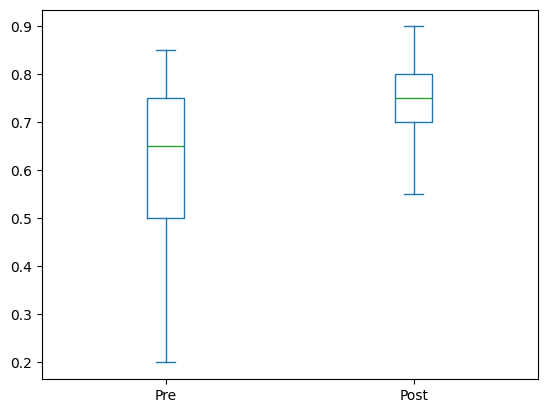

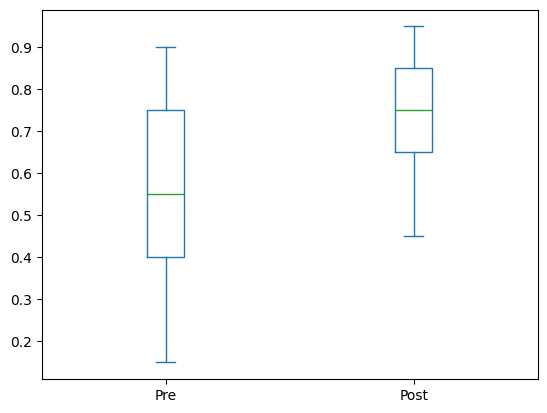

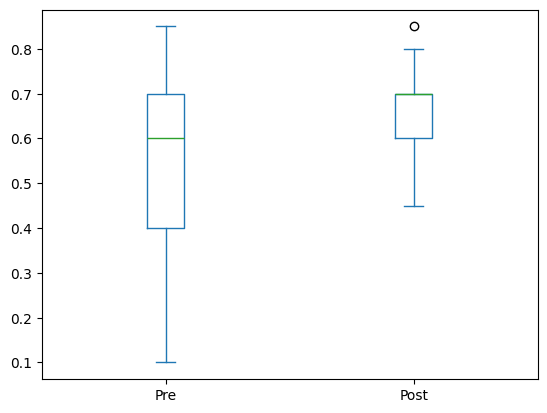

TtestResult(statistic=-2.759247969686027, pvalue=0.007935926926807958, df=53.0)
TtestResult(statistic=-3.202012407739351, pvalue=0.0023087585672519123, df=53.0)
TtestResult(statistic=-2.3318194646330084, pvalue=0.02354306863343014, df=53.0)


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.DataFrame({'Pre': exp_fewShot_pre[:25], 'Post': exp_fewShot_post})
df.plot.box()
plt.show()
df = pd.DataFrame({'Pre': fid_fewShot_pre[:25], 'Post': fid_fewShot_post})
df.plot.box()
plt.show()
df = pd.DataFrame({'Pre': app_fewShot_pre[:25], 'Post': app_fewShot_post})
df.plot.box()
plt.show()
from scipy.stats import ttest_ind
print(ttest_ind(exp_fewShot_pre, exp_fewShot_post))
print(ttest_ind(fid_fewShot_pre, fid_fewShot_post))
print(ttest_ind(app_fewShot_pre, app_fewShot_post))

In [ ]:
file_fewShot = '/home/shailja/asee/FewShotAIHealth.xlsx'
df = pd.read_excel(file_fewShot)
df = df.set_index('Responses')
fewShot = df.to_dict()
print(fewShot['Realism '].keys())
print(fewShot['Health'].keys())
print(fewShot['Ethics'].keys())

real_fewShot_pre = []
real_fewShot_post = []
health_fewShot_pre = []
health_fewShot_post = []
ethics_fewShot_pre = []
ethics_fewShot_post = []

for key in list(fewShot['Realism '].keys())[:30]:    
    real_fewShot_pre.append(fewShot['Realism '][key])
    health_fewShot_pre.append(fewShot['Health'][key])
    ethics_fewShot_pre.append(fewShot['Ethics'][key])
for key in list(fewShot['Realism '].keys())[30:]:
    real_fewShot_post.append(fewShot['Realism '][key])
    health_fewShot_post.append(fewShot['Health'][key])
    ethics_fewShot_post.append(fewShot['Ethics'][key])


print(len(real_fewShot_pre), len(real_fewShot_post), len(health_fewShot_pre), len(health_fewShot_post), len(ethics_fewShot_pre), len(ethics_fewShot_post))
 


In [12]:
#p value for pre and post for realism health and ethics
print(ttest_ind(real_fewShot_pre, real_fewShot_post))
print(ttest_ind(health_fewShot_pre, health_fewShot_post))
print(ttest_ind(ethics_fewShot_pre, ethics_fewShot_post))

#latex title for p-values



TtestResult(statistic=-1.3464844101140447, pvalue=0.18387673976899108, df=53.0)
TtestResult(statistic=-0.8126537262883157, pvalue=0.42005206152399877, df=53.0)
TtestResult(statistic=-0.33006442172871236, pvalue=0.7426524018563005, df=53.0)


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import scipy.stats as stats
import textwrap
def violinPlot(sequence1, sequence2, pre_text, post_text):
    data = sequence1 + sequence2
    categories = ['Pre-course survey'] * len(sequence1) + ['Post-course survey'] * len(sequence2)

    colors = ['skyblue', 'lightcoral']

    plt.figure(figsize=(12,7))
    sns.violinplot(x=categories, y=data, inner=None, palette=colors, alpha=0.8)

    sns.stripplot(x=categories, y=data, jitter=True, marker="o", edgecolor="black", linewidth=0.5, size=10, palette=colors, order=['Pre-course survey', 'Post-course survey'])

    wrapped_pre = "Pre-course: "+textwrap.fill(pre_text, 120)
    wrapped_post = "Post-course: " + textwrap.fill(post_text, 120)

    wrapped_title = '\n'.join([wrapped_pre, wrapped_post])

    plt.title(wrapped_title, fontsize=15, loc='left')
    plt.ylabel('Value', fontsize=20)
    plt.xlabel('', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    p_val_a = stats.ttest_ind(sequence1, sequence2, nan_policy='omit')[1]
    plt.text(1.35, max(data) * 0.95, f'p = {p_val_a:.1e}', horizontalalignment='center', verticalalignment='center', fontsize=20)

[0.6, 0.5, 0.7, 0.65, 0.65, 0.2, 0.7, 0.85, 0.4, 0.6, 0.75, 0.55, 0.8, 0.3, 0.5, 0.85, 0.4, 0.7, 0.8, 0.6, 0.65, 0.4, 0.75, 0.65, 0.85, 0.2, 0.9, 0.8, 0.75, 0.8]
[0.8, 0.75, 0.65, 0.8, 0.85, 0.75, 0.9, 0.7, 0.7, 0.75, 0.8, 0.7, 0.85, 0.7, 0.8, 0.8, 0.85, 0.85, 0.7, 0.65, 0.6, 0.6, 0.8, 0.55, 0.7]
p_val_NN_NN:  0.007935926926807958
[0.45, 0.35, 0.7, 0.6, 0.5, 0.5, 0.55, 0.85, 0.65, 0.2, 0.75, 0.55, 0.9, 0.15, 0.4, 0.8, 0.3, 0.5, 0.75, 0.35, 0.6, 0.4, 0.8, 0.75, 0.9, 0.0, 0.9, 0.8, 0.7, 0.8]
[0.8, 0.7, 0.65, 0.9, 0.95, 0.7, 0.9, 0.75, 0.65, 0.8, 0.85, 0.65, 0.85, 0.65, 0.8, 0.75, 0.9, 0.85, 0.8, 0.65, 0.45, 0.6, 0.85, 0.6, 0.7]
p_val_NN_NN:  0.0023087585672519123
[0.1, 0.4, 0.6, 0.7, 0.6, 0.3, 0.5, 0.8, 0.5, 0.7, 0.8, 0.6, 0.85, 0.2, 0.3, 0.8, 0.3, 0.5, 0.7, 0.4, 0.6, 0.2, 0.7, 0.7, 0.7, 0.1, 0.8, 0.7, 0.6, 0.7]
[0.7, 0.6, 0.45, 0.8, 0.7, 0.7, 0.8, 0.6, 0.5, 0.7, 0.7, 0.6, 0.8, 0.6, 0.7, 0.7, 0.7, 0.85, 0.7, 0.6, 0.5, 0.6, 0.7, 0.6, 0.6]


/tmp/ipykernel_207338/1405594358.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=categories, y=data, inner=None, palette=colors, alpha=0.8)
/tmp/ipykernel_207338/1405594358.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=categories, y=data, jitter=True, marker="o", edgecolor="black", linewidth=0.5, size=10, palette=colors, order=['Pre-course survey', 'Post-course survey'])
/tmp/ipykernel_207338/1405594358.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=categories, y=data, inner=None, palette=colors, alpha=0.8)
/t

p_val_NN_NN:  0.02354306863343014


/tmp/ipykernel_207338/1405594358.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=categories, y=data, jitter=True, marker="o", edgecolor="black", linewidth=0.5, size=10, palette=colors, order=['Pre-course survey', 'Post-course survey'])


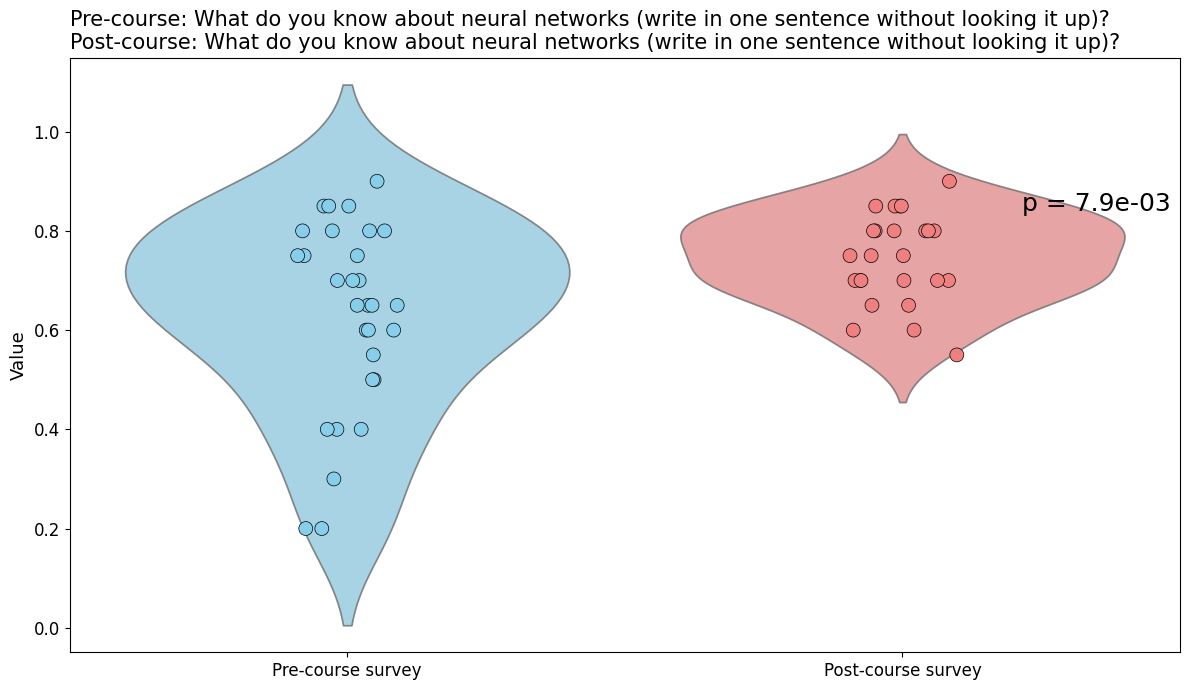

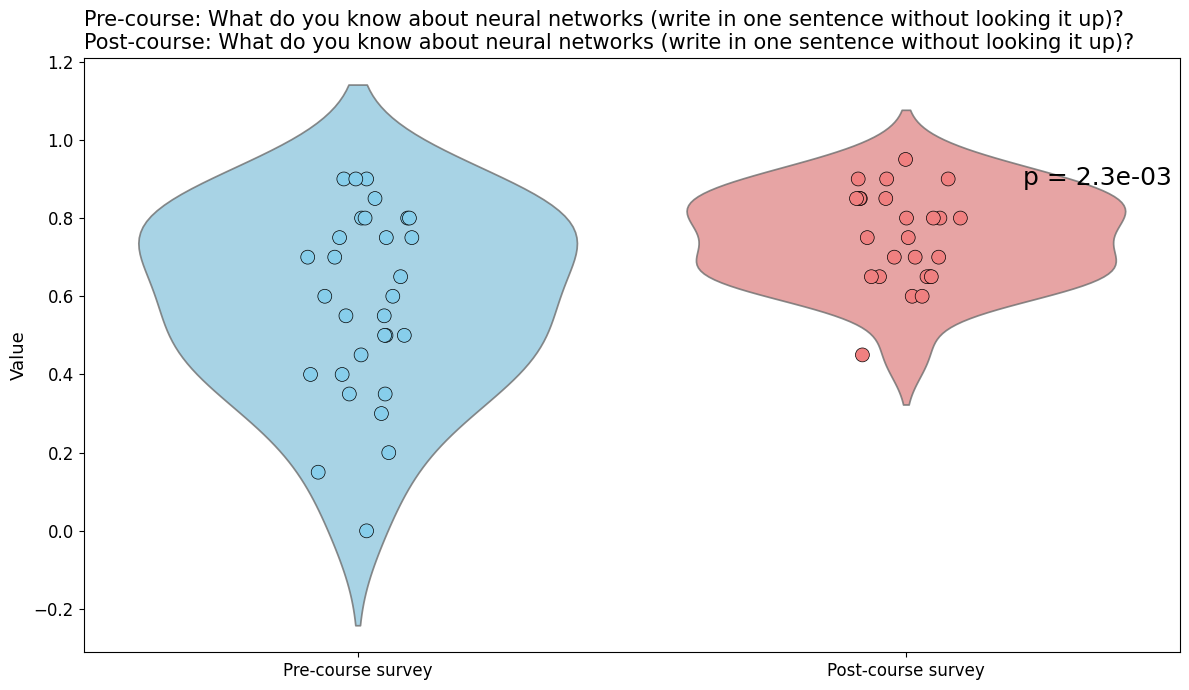

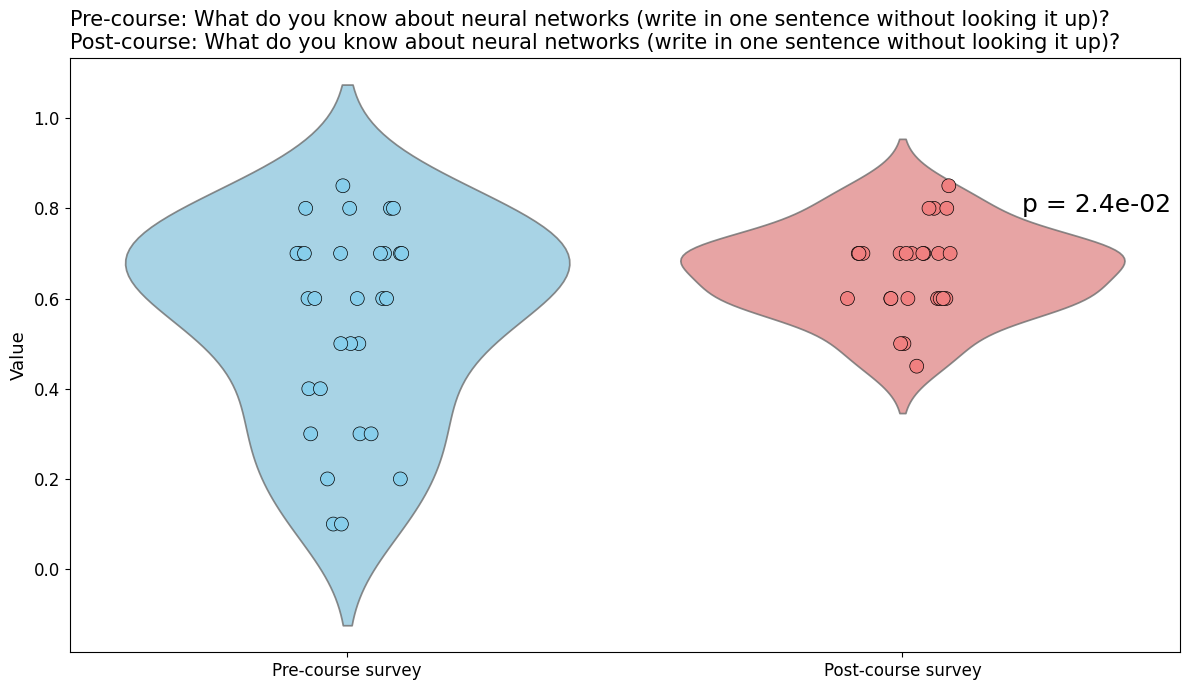

In [14]:
sequence1 = exp_fewShot_pre
print(sequence1)
sequence2 = exp_fewShot_post
print(sequence2)

p_val_NN_NN = stats.ttest_ind(sequence1, sequence2, nan_policy='omit')[1]
violinPlot(sequence1, sequence2, "What do you know about neural networks (write in one sentence without looking it up)?", "What do you know about neural networks (write in one sentence without looking it up)?")
print("p_val_NN_NN: ", p_val_NN_NN)
plt.savefig('Expression.svg', format='svg', dpi=400)

sequence1 = fid_fewShot_pre
print(sequence1)
sequence2 = fid_fewShot_post
print(sequence2)

p_val_NN_NN = stats.ttest_ind(sequence1, sequence2, nan_policy='omit')[1]
violinPlot(sequence1, sequence2, "What do you know about neural networks (write in one sentence without looking it up)?", "What do you know about neural networks (write in one sentence without looking it up)?")
print("p_val_NN_NN: ", p_val_NN_NN)
plt.savefig('Fidelity.svg', format='svg', dpi=400)

sequence1 = app_fewShot_pre
print(sequence1)
sequence2 = app_fewShot_post
print(sequence2)

p_val_NN_NN = stats.ttest_ind(sequence1, sequence2, nan_policy='omit')[1]
violinPlot(sequence1, sequence2, "What do you know about neural networks (write in one sentence without looking it up)?", "What do you know about neural networks (write in one sentence without looking it up)?")
print("p_val_NN_NN: ", p_val_NN_NN)
plt.savefig('Applicability.svg', format='svg', dpi=400)


[0.9, 0.65, 0.85, 0.75, 0.65, 0.7, 0.85, 0.8, 0.85, 0.75, 0.9, 0.8, 0.9, 0.65, 0.35, 0.8, 0.8, 0.6, 0.8, 0.65, 0.75, 0.55, 0.8, 0.75, 0.8, 0.7, 0.7, 0.8, 0.75, 0.7]
[0.65, 0.85, 0.85, 0.85, 0.9, 0.8, 0.8, 0.7, 0.75, 0.7, 0.8, 0.8, 0.8, 0.8, 0.8, 0.7, 0.8, 0.75, 0.8, 0.7, 0.75, 0.85, 0.8, 0.7, 0.75]
p_val:  0.18387673976899108
[0.9, 0.4, 0.8, 0.6, 0.6, 0.2, 0.9, 0.8, 0.9, 0.7, 0.9, 0.7, 0.95, 0.5, 0.6, 0.75, 0.8, 0.6, 0.8, 0.7, 0.8, 0.7, 0.8, 0.85, 0.8, 0.7, 0.65, 0.8, 0.75, 0.7]
[0.1, 0.85, 0.75, 0.8, 0.9, 0.7, 0.8, 0.65, 0.8, 0.7, 0.8, 0.8, 0.9, 0.85, 0.8, 0.7, 0.75, 0.7, 0.8, 0.8, 0.75, 0.9, 0.8, 0.75, 0.75]
p_val:  0.42005206152399877
[0.9, 0.7, 0.85, 0.65, 0.7, 0.25, 0.8, 0.7, 0.9, 0.95, 0.85, 0.75, 0.95, 0.6, 0.7, 0.8, 0.8, 0.7, 0.8, 0.65, 0.8, 0.6, 0.8, 0.8, 0.8, 0.75, 0.75, 0.8, 0.8, 0.75]
[0.7, 0.85, 0.9, 0.8, 0.95, 0.85, 0.8, 0.75, 0.8, 0.7, 0.85, 0.85, 0.8, 0.8, 0.8, 0.1, 0.75, 0.55, 0.8, 0.8, 0.75, 0.95, 0.8, 0.75, 0.75]
p_val:  0.7426524018563005


/tmp/ipykernel_207338/1405594358.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=categories, y=data, inner=None, palette=colors, alpha=0.8)
/tmp/ipykernel_207338/1405594358.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=categories, y=data, jitter=True, marker="o", edgecolor="black", linewidth=0.5, size=10, palette=colors, order=['Pre-course survey', 'Post-course survey'])
/tmp/ipykernel_207338/1405594358.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=categories, y=data, inner=None, palette=colors, alpha=0.8)
/t

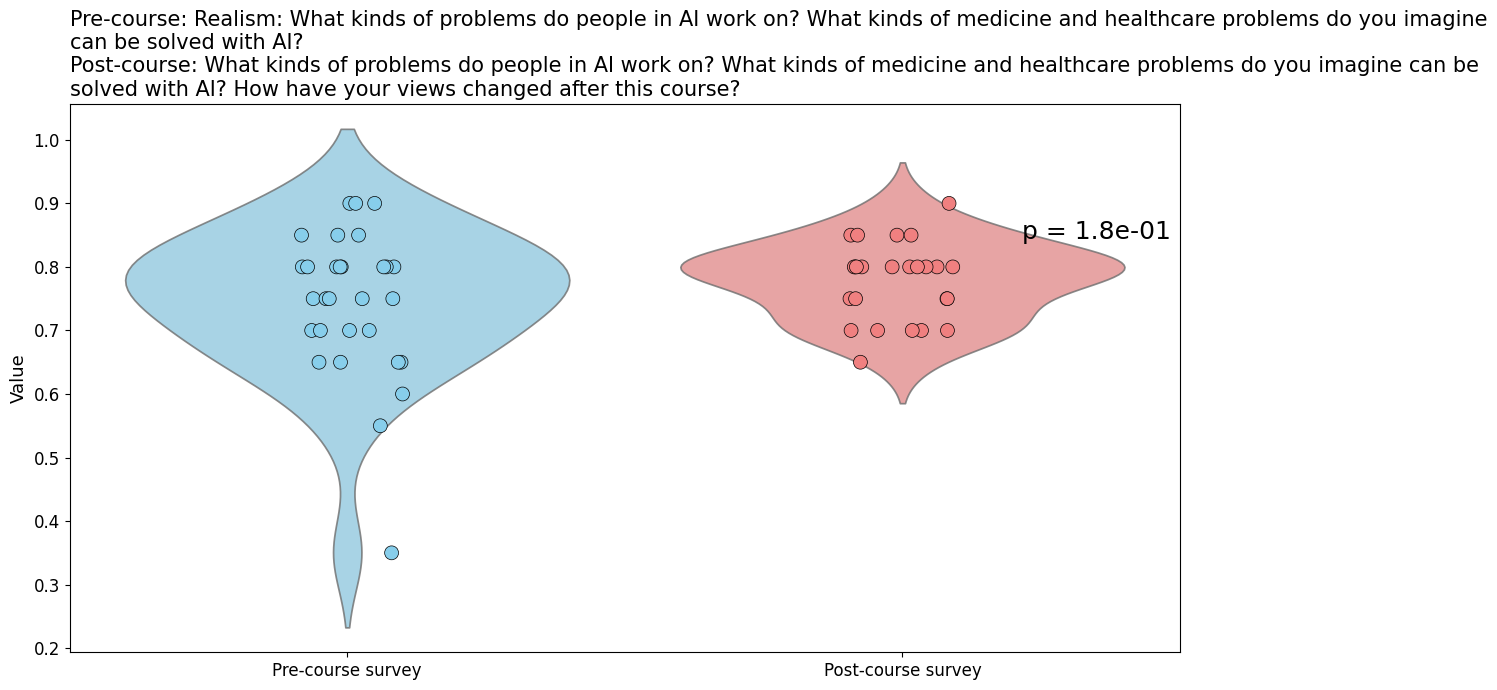

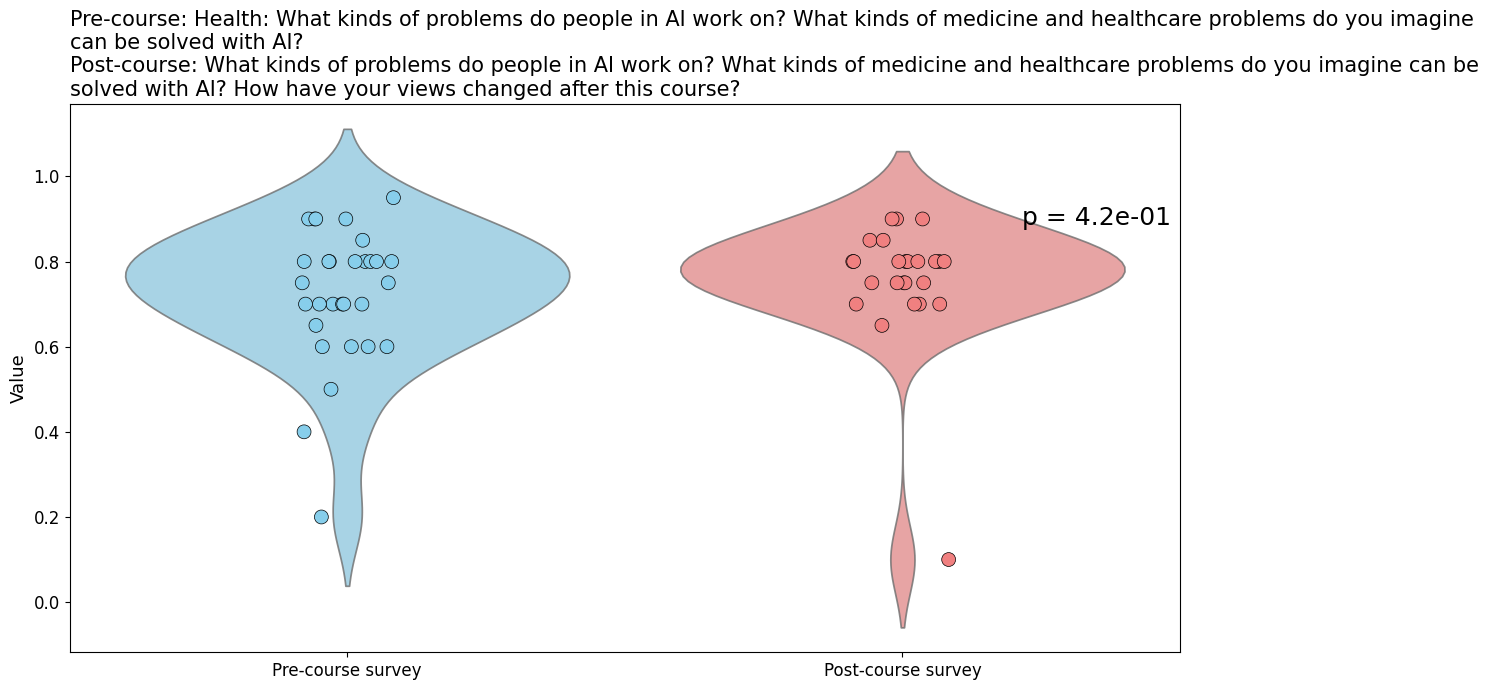

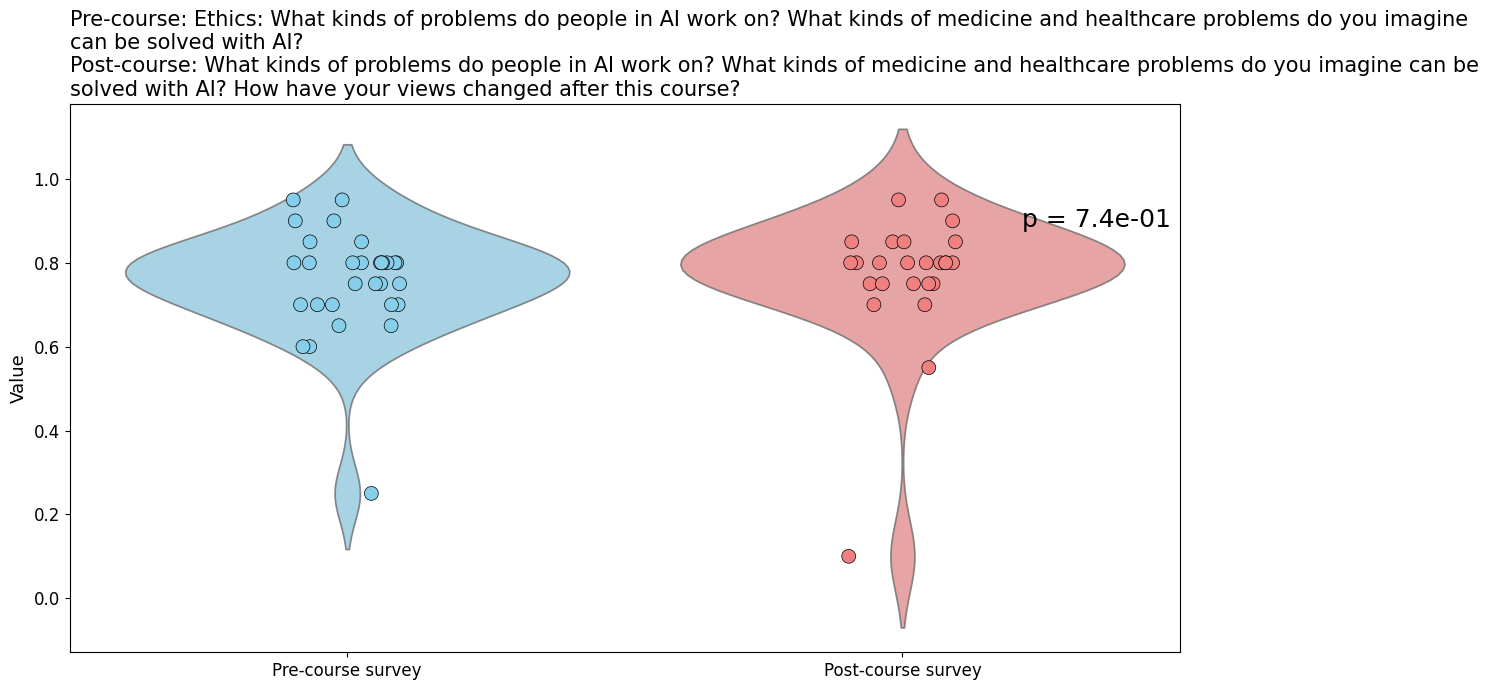

In [15]:
sequence1 = real_fewShot_pre
print(sequence1)
sequence2 = real_fewShot_post
print(sequence2)

p_val = stats.ttest_ind(sequence1, sequence2, nan_policy='omit')[1]
violinPlot(sequence1, sequence2, "Realism: What kinds of problems do people in AI work on? What kinds of medicine and healthcare problems do you imagine can be solved with AI?","What kinds of problems do people in AI work on? What kinds of medicine and healthcare problems do you imagine can be solved with AI? How have your views changed after this course?")
print("p_val: ", p_val)

sequence1 = health_fewShot_pre
print(sequence1)
sequence2 = health_fewShot_post
print(sequence2)

p_val = stats.ttest_ind(sequence1, sequence2, nan_policy='omit')[1]
violinPlot(sequence1, sequence2, "Health: What kinds of problems do people in AI work on? What kinds of medicine and healthcare problems do you imagine can be solved with AI?","What kinds of problems do people in AI work on? What kinds of medicine and healthcare problems do you imagine can be solved with AI? How have your views changed after this course?")
print("p_val: ", p_val)

sequence1 = ethics_fewShot_pre
print(sequence1)
sequence2 = ethics_fewShot_post
print(sequence2)

p_val = stats.ttest_ind(sequence1, sequence2, nan_policy='omit')[1]
violinPlot(sequence1, sequence2, "Ethics: What kinds of problems do people in AI work on? What kinds of medicine and healthcare problems do you imagine can be solved with AI?","What kinds of problems do people in AI work on? What kinds of medicine and healthcare problems do you imagine can be solved with AI? How have your views changed after this course?")
print("p_val: ", p_val)
